# Simulations of the semi-discrete prey-predator models

In [138]:
#Dependancies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## 1. Model without interaction

### 1.1 Definition of the model

In [178]:
#Definition of the semi-discrete model
def no_int_model(
    xy: list,
    t = np.linspace(0,20,201),
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y 
    
    Param:
        xy: a list of values of [x,y] at a time t_n
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        dx, dy: a list of the two population size of x and y at time t_{n+1}'''
    
    #Initialisation
    x = xy[0]
    y = xy[1]

    #Continuous part of the model
    dx = r*x * (1 - x/K) - (a*x/(c + x)) * y
    dy = gamma * (a*x/(c + x)) * y - m*y

    return dx, dy



#### Define a function to solve the semi-dicrete ODE system

In [179]:
def solve_no_int_ode(
    xy: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
    mu: float = 1,
    T: float = 5,
    t_0: float = 0,
    t_n: float = 20
        
):
    '''This function gives the anwser of the semi-discrete ODE system with the no-interference model 
    
    Param:
        model: the chosen model
        xy: put the initial value here. It will be changed along the for loop
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        mu: release rate
        T: release period
        start: left endpoint of the domain
        end: right endpoint of the domain
        
    Return:
        x, y: values of the solution (x, y) of the ODE
        t: the time vector that has the same shape as x and y'''
    
    #Store solution in lists
    x = [] #empty list
    y = [] #empty list

    #Record initial conditions
    x.append(xy[0])
    y.append(xy[1])

    #Solve ODE
    intervals = np.arange(t_0, t_n, T) #divide the domain in intervals on length T
    for i in range(1,len(intervals)):
        xy_kT_plus = [x[-1],y[-1]] #the initial value in a period is [x(kT+), y(kT+)] that is the last element of [x,y]
        #Span for this period
        tspan = np.arange(intervals[i-1], intervals[i], 0.01) 
        #Solve for this period
        xy_step = odeint(no_int_model, xy_kT_plus, tspan, args=(r, K, a, c, m, gamma)) 
        x.extend(xy_step.T[0])
        y.extend(xy_step.T[1][:-1]) #Continuous part of y
        y_kT_plus = xy_step.T[1][-1] + mu*T #Equation of the discrete part
        y.append(y_kT_plus)

    t = np.linspace(t_0, t_n, len(y))

    return x, y, t

### 1.2 Simulations when GAS conditions are satisfied

Check if the condition of GAS is filled for the default values

$\mu = 1$  
$c = 20 > K = 10$  
$\frac{rmc}{a} = 0.25$  
$\mu > \frac{rmc}{a}$  
The condition is satisfied.

#### Solve ODE

Solve ODE for the periodical solution

In [180]:
#Initial conditions
mu = 1
T = 5
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_no_int_ode(xy_p_0)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [181]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_no_int_ode(x0y0_a)

x_a = xy_a[0]
y_a = xy_a[1]

In [182]:
#[1.5,3]
#Initial condition
x0_b = 1.5 
y0_b = 3
x0y0_b = [x0_b, y0_b]

#Solve ODE
xy_b = solve_no_int_ode(x0y0_b)

x_b = xy_b[0]
y_b = xy_b[1]

In [183]:
#[1,2]
#Initial condition
x0_c = 1
y0_c = 2
x0y0_c = [x0_c, y0_c]

#Solve ODE
xy_c = solve_no_int_ode(x0y0_c)

x_c = xy_c[0]
y_c = xy_c[1]

In [184]:
#[2,3]
#Initial condition
x0_d = 2
y0_d = 3
x0y0_d = [x0_d, y0_d]

#Solve ODE
xy_d = solve_no_int_ode(x0y0_d)

x_d = xy_d[0]
y_d = xy_d[1]

In [185]:
#[1,1]
#Initial condition
x0_e = 1
y0_e = 1
x0y0_e = [x0_e, y0_e]

#Solve ODE
xy_e = solve_no_int_ode(x0y0_e)

x_e = xy_e[0]
y_e = xy_e[1]

In [186]:
#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_no_int_ode(x0y0_f)

x_f = xy_f[0]
y_f = xy_f[1]

In [187]:
#[1.5,1]
#Initial condition
x0_g = 1.5
y0_g = 1
x0y0_g = [x0_g, y0_g]

#Solve ODE
xy_g = solve_no_int_ode(x0y0_g)

x_g = xy_g[0]
y_g = xy_g[1]

In [188]:
#[2,2]
#Initial condition
x0_h = 2
y0_h = 2
x0y0_h = [x0_h, y0_h]

#Solve ODE
xy_h = solve_no_int_ode(x0y0_h)

x_h = xy_h[0]
y_h = xy_h[1]

In [189]:
#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_no_int_ode(x0y0_i)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

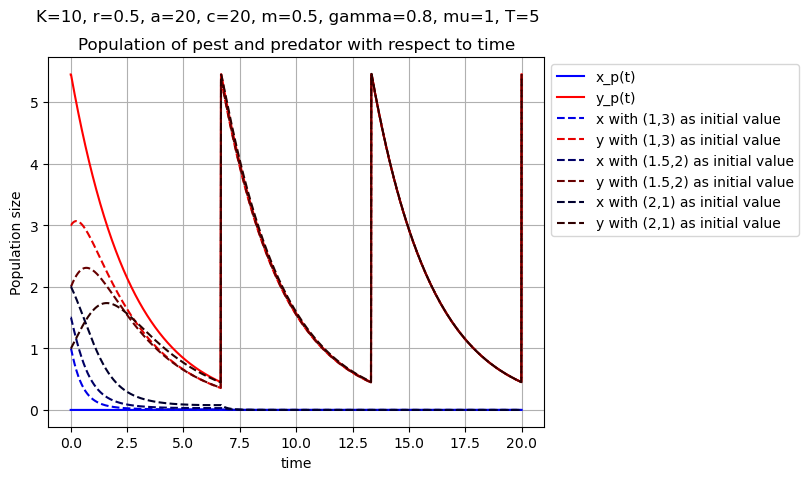

In [190]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
#plt.plot(t, x_b, color = (0,0,0.8), linestyle='--', label='x with (1.5,3) as initial value')
#plt.plot(t, y_b, color = (0.8,0,0), linestyle='--', label='y with (1.5,3) as initial value')
#plt.plot(t, x_c, color = (0,0,0.7), linestyle='--', label='x with (1,2) as initial value')
#plt.plot(t, y_c, color = (0.7,0,0), linestyle='--', label='y with (1,2) as initial value')
#plt.plot(t, x_d, color = (0,0,0.6), linestyle='--', label='x with (2,3) as initial value')
#plt.plot(t, y_d, color = (0.6,0,0), linestyle='--', label='y with (2,3) as initial value')
#plt.plot(t, x_e, color = (0,0,0.5), linestyle='--', label='x with (1,1) as initial value')
#plt.plot(t, y_e, color = (0.5,0,0), linestyle='--', label='y with (1,1) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
#plt.plot(t, x_g, color = (0,0,0.3), linestyle='--', label='x with (1.5,1) as initial value')
#plt.plot(t, y_g, color = (0.3,0,0), linestyle='--', label='y with (1.5,1) as initial value')
#plt.plot(t, x_h, color = (0,0,0.2), linestyle='--', label='x with (2,2) as initial value')
#plt.plot(t, y_h, color = (0.2,0,0), linestyle='--', label='y with (2,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 1.3 Simulations when GAS neither LAS conditions are not satisfied

Change $\mu$ to $0.2$  
$\mu = 0.2 < \frac{rmc}{a} = 0.25$  
The stability conditions are not satisfied. 

#### Solve ODE

Solve ODE for the periodical solution

In [191]:
#Initial conditions
mu = 0.1
T = 5
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_no_int_ode(xy_p_0, mu=mu, t_n=30)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [192]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_no_int_ode(x0y0_a, mu=mu, t_n=30)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_no_int_ode(x0y0_f, mu=mu, t_n=30)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_no_int_ode(x0y0_i, mu=mu, t_n=30)

x_i = xy_i[0]
y_i = xy_i[1]

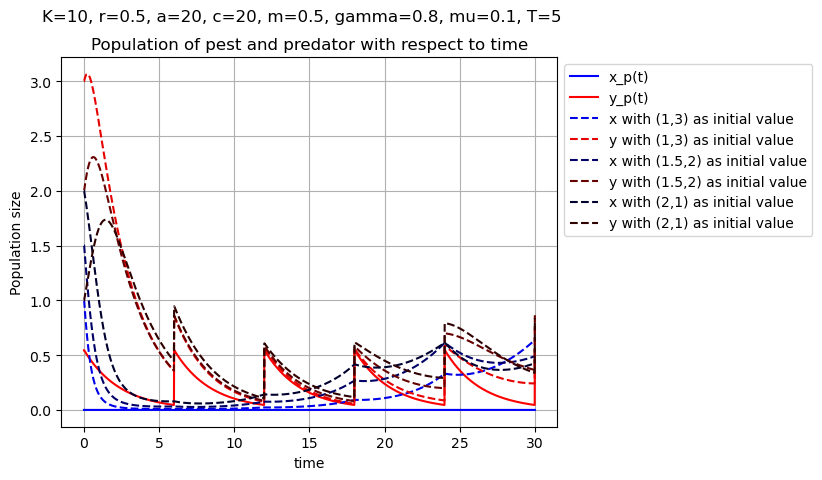

In [193]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
#plt.plot(t, x_b, color = (0,0,0.8), linestyle='--', label='x with (1.5,3) as initial value')
#plt.plot(t, y_b, color = (0.8,0,0), linestyle='--', label='y with (1.5,3) as initial value')
#plt.plot(t, x_c, color = (0,0,0.7), linestyle='--', label='x with (1,2) as initial value')
#plt.plot(t, y_c, color = (0.7,0,0), linestyle='--', label='y with (1,2) as initial value')
#plt.plot(t, x_d, color = (0,0,0.6), linestyle='--', label='x with (2,3) as initial value')
#plt.plot(t, y_d, color = (0.6,0,0), linestyle='--', label='y with (2,3) as initial value')
#plt.plot(t, x_e, color = (0,0,0.5), linestyle='--', label='x with (1,1) as initial value')
#plt.plot(t, y_e, color = (0.5,0,0), linestyle='--', label='y with (1,1) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
#plt.plot(t, x_g, color = (0,0,0.3), linestyle='--', label='x with (1.5,1) as initial value')
#plt.plot(t, y_g, color = (0.3,0,0), linestyle='--', label='y with (1.5,1) as initial value')
#plt.plot(t, x_h, color = (0,0,0.2), linestyle='--', label='x with (2,2) as initial value')
#plt.plot(t, y_h, color = (0.2,0,0), linestyle='--', label='y with (2,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, mu=0.1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 2. Beddington-DeAngelis model

### 2.1 Definition of the model

In [194]:
#Definition of the semi-discrete model
def bda_model(
    xy: list,
    t = np.linspace(0,20,201),
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
    b: float = 5
) -> list:
    
    '''This model is a continuous model that describes the evolution of a pest population x and a predator population y following the Beddington-DeAngelis model
    
    Param:
        xy: a list of values of [x,y] at a time t_n
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        b: penalty coefficient of the predator efficiency
        
    Return:
        dx, dy: a list of the two population size of x and y at time t_{n+1}'''
    
    #Initialisation
    x = xy[0]
    y = xy[1]

    #Continuous part of the model
    dx = r*x * (1 - x/K) - (a*x/(c + x + b*y)) * y
    dy = gamma * (a*x/(c + x + b*y)) * y - m*y

    return dx, dy

#### Define a function to solve the semi-dicrete ODE system

In [195]:
def solve_bda_ode(
    xy: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
    b: float = 5,
    mu: float = 1,
    T: float = 5,
    t_0: float = 0,
    t_n: float = 20
        
):
    '''This function gives the anwser of the semi-discrete ODE system with Bedington-DeAngelis model 
    
    Param:
        model: the chosen model
        xy: put the initial value here. It will be changed along the for loop
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        b: penalty coefficient of the predator efficiency
        mu: release rate
        T: release period
        start: left endpoint of the domain
        end: right endpoint of the domain
        
    Return:
        x, y: values of the solution (x, y) of the ODE
        t: the time vector that has the same shape as x and y'''
    
    #Store solution in lists
    x = [] #empty list
    y = [] #empty list

    #Record initial conditions
    x.append(xy[0])
    y.append(xy[1])

    #Solve ODE
    intervals = np.arange(t_0, t_n, T) #divide the domain in intervals on length T
    for i in range(1,len(intervals)):
        xy_kT_plus = [x[-1],y[-1]] #the initial value in a period is [x(kT+), y(kT+)] that is the last element of [x,y]
        #Span for this period
        tspan = np.arange(intervals[i-1], intervals[i], 0.01) 
        #Solve for this period
        xy_step = odeint(bda_model, xy_kT_plus, tspan, args=(r, K, a, c, m, gamma, b)) 
        x.extend(xy_step.T[0])
        y.extend(xy_step.T[1][:-1]) #Continuous part of y
        y_kT_plus = xy_step.T[1][-1] + mu*T #Equation of the discrete part
        y.append(y_kT_plus)

    t = np.linspace(t_0, t_n, len(y))

    return x, y, t

### 2.2 Simulations when GAS conditions are satisfied

First condition:  
$r = 0.5 < \frac{a}{b} = \frac{20}{4} = 5$

Second condition  
Let's define the function which calculate $\mu_b$ which is the theshold above which $\mu$ should be to have GAS

In [196]:
def mu_b(
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5, 
    b: float = 5,
    T: float = 5
):
    factor_1 = (c + K)/b
    num_factor_2 = 1 - np.exp(- (r*b/a) * m*T)
    den_factor_2 = np.exp(- (r*b/a) * m*T) - np.exp(-m*T)
    factor_2 = num_factor_2/den_factor_2
    factor_3 = (1 - np.exp(-m*T))/T
    result = factor_1 * factor_2 * factor_3

    return result

In [197]:
mu_b()

0.45513611612562244

$\mu = 1 > 0.5 > \mu_b $  
The two conditions of GAS are satisfied.

#### Solve ODE

Solve ODE for the periodical solution

In [198]:
#Initial conditions
mu = 1
T = 5
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, mu=mu)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [199]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, mu=mu)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, mu=mu)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, mu=mu)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

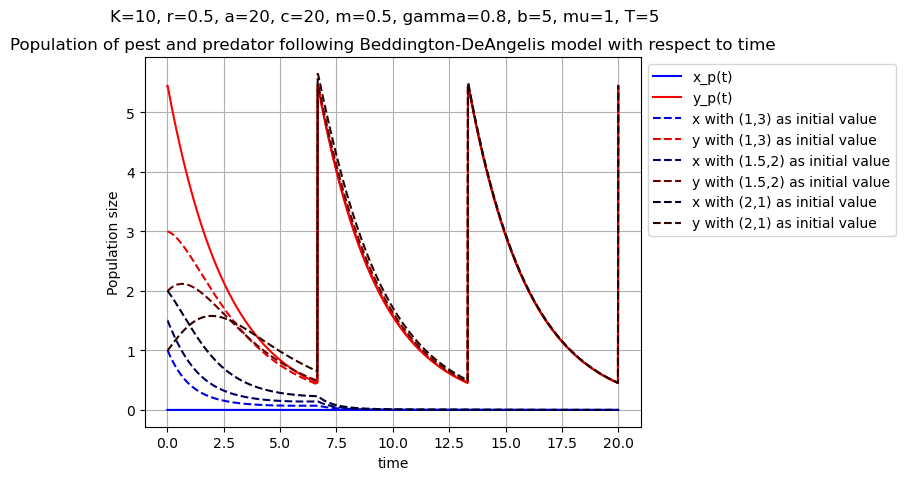

In [200]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
#plt.plot(t, x_b, color = (0,0,0.8), linestyle='--', label='x with (1.5,3) as initial value')
#plt.plot(t, y_b, color = (0.8,0,0), linestyle='--', label='y with (1.5,3) as initial value')
#plt.plot(t, x_c, color = (0,0,0.7), linestyle='--', label='x with (1,2) as initial value')
#plt.plot(t, y_c, color = (0.7,0,0), linestyle='--', label='y with (1,2) as initial value')
#plt.plot(t, x_d, color = (0,0,0.6), linestyle='--', label='x with (2,3) as initial value')
#plt.plot(t, y_d, color = (0.6,0,0), linestyle='--', label='y with (2,3) as initial value')
#plt.plot(t, x_e, color = (0,0,0.5), linestyle='--', label='x with (1,1) as initial value')
#plt.plot(t, y_e, color = (0.5,0,0), linestyle='--', label='y with (1,1) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
#plt.plot(t, x_g, color = (0,0,0.3), linestyle='--', label='x with (1.5,1) as initial value')
#plt.plot(t, y_g, color = (0.3,0,0), linestyle='--', label='y with (1.5,1) as initial value')
#plt.plot(t, x_h, color = (0,0,0.2), linestyle='--', label='x with (2,2) as initial value')
#plt.plot(t, y_h, color = (0.2,0,0), linestyle='--', label='y with (2,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 2.3 Simulations when LAS conditions are satisfied but not GAS

In [201]:
mu_b(K=0)

0.3034240774170816

Let's take $\mu = 0.31$, between the two threshold and very close to the LAS threshold

#### Solve ODE

Solve ODE for the periodical solution

In [202]:
#Initial conditions
mu = 0.31
T = 5
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, mu=mu)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [203]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, mu=mu)

x_a = xy_a[0]
y_a = xy_a[1]



#[2,6]
#Initial condition
x0_f = 2
y0_f = 6
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, mu=mu)

x_f = xy_f[0]
y_f = xy_f[1]



#[4,12]
#Initial condition
x0_i = 4
y0_i = 12
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, mu=mu)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

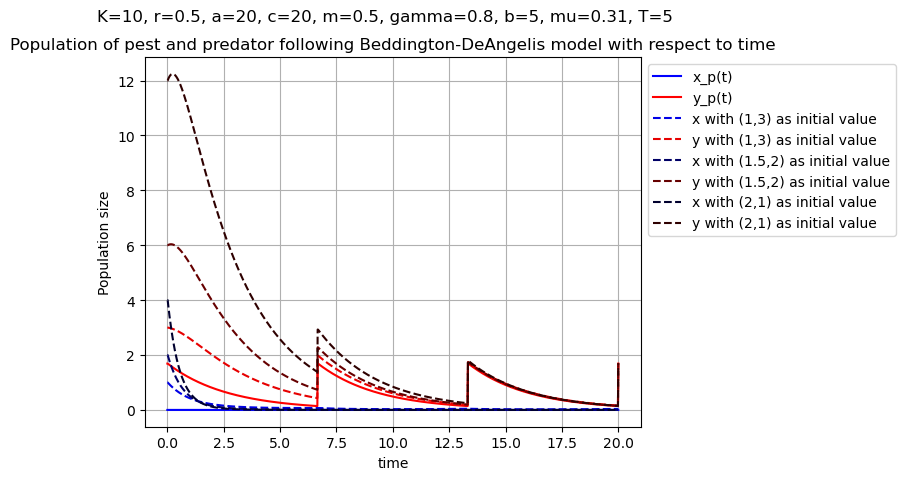

In [204]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
#plt.plot(t, x_b, color = (0,0,0.8), linestyle='--', label='x with (1.5,3) as initial value')
#plt.plot(t, y_b, color = (0.8,0,0), linestyle='--', label='y with (1.5,3) as initial value')
#plt.plot(t, x_c, color = (0,0,0.7), linestyle='--', label='x with (1,2) as initial value')
#plt.plot(t, y_c, color = (0.7,0,0), linestyle='--', label='y with (1,2) as initial value')
#plt.plot(t, x_d, color = (0,0,0.6), linestyle='--', label='x with (2,3) as initial value')
#plt.plot(t, y_d, color = (0.6,0,0), linestyle='--', label='y with (2,3) as initial value')
#plt.plot(t, x_e, color = (0,0,0.5), linestyle='--', label='x with (1,1) as initial value')
#plt.plot(t, y_e, color = (0.5,0,0), linestyle='--', label='y with (1,1) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
#plt.plot(t, x_g, color = (0,0,0.3), linestyle='--', label='x with (1.5,1) as initial value')
#plt.plot(t, y_g, color = (0.3,0,0), linestyle='--', label='y with (1.5,1) as initial value')
#plt.plot(t, x_h, color = (0,0,0.2), linestyle='--', label='x with (2,2) as initial value')
#plt.plot(t, y_h, color = (0.2,0,0), linestyle='--', label='y with (2,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=0.31, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

For any initial values tested, solutions still converge to the periodic solution

### 2.4 Simulations when LAS conditions are not satisfied

#### Solve ODE

Solve ODE for the periodic solution

In [205]:
#Initial conditions
mu = 0.1
T = 5
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, mu=mu, t_n = 30)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial conditions

In [206]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, mu=mu, t_n = 30)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, mu=mu, t_n = 30)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, mu=mu, t_n = 30)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

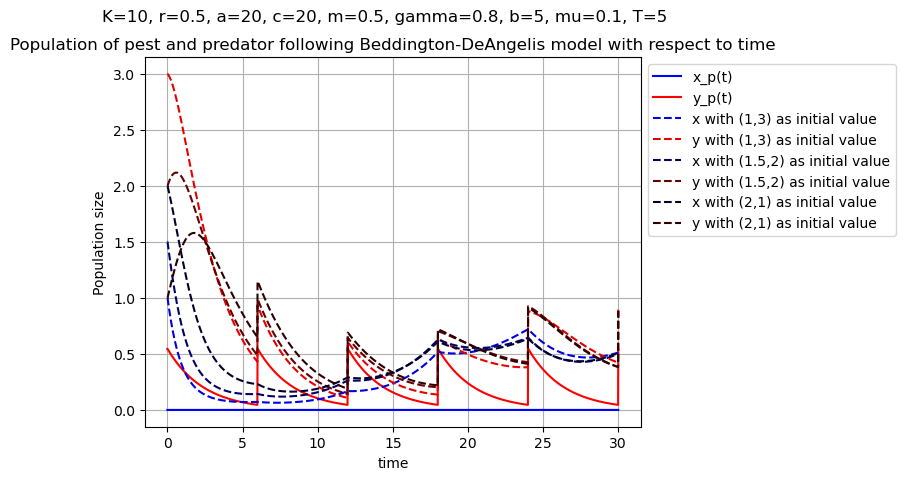

In [207]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
#plt.plot(t, x_b, color = (0,0,0.8), linestyle='--', label='x with (1.5,3) as initial value')
#plt.plot(t, y_b, color = (0.8,0,0), linestyle='--', label='y with (1.5,3) as initial value')
#plt.plot(t, x_c, color = (0,0,0.7), linestyle='--', label='x with (1,2) as initial value')
#plt.plot(t, y_c, color = (0.7,0,0), linestyle='--', label='y with (1,2) as initial value')
#plt.plot(t, x_d, color = (0,0,0.6), linestyle='--', label='x with (2,3) as initial value')
#plt.plot(t, y_d, color = (0.6,0,0), linestyle='--', label='y with (2,3) as initial value')
#plt.plot(t, x_e, color = (0,0,0.5), linestyle='--', label='x with (1,1) as initial value')
#plt.plot(t, y_e, color = (0.5,0,0), linestyle='--', label='y with (1,1) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
#plt.plot(t, x_g, color = (0,0,0.3), linestyle='--', label='x with (1.5,1) as initial value')
#plt.plot(t, y_g, color = (0.3,0,0), linestyle='--', label='y with (1.5,1) as initial value')
#plt.plot(t, x_h, color = (0,0,0.2), linestyle='--', label='x with (2,2) as initial value')
#plt.plot(t, y_h, color = (0.2,0,0), linestyle='--', label='y with (2,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=0.1, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 2.5 Simulations when $r > \frac{a}{b}$ even for a high $\mu$

#### Solve ODE

Solve ODE for the periodic solution

In [208]:
#Initial conditions
r = 6
mu = 2
T = 5
m=0.5
y_p_0 = mu*T/(1 - np.exp(-m*T))
xy_p_0 = [0, y_p_0]

#Solve ODE
xy_p = solve_bda_ode(xy_p_0, r=r, mu=mu)

x_p = xy_p[0]
y_p = xy_p[1]

#time points
t = xy_p[2]

Solve ODE for other initial values

In [209]:
#[1,3]
#Initial condition
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

#Solve ODE
xy_a = solve_bda_ode(x0y0_a, r=r, mu=mu)

x_a = xy_a[0]
y_a = xy_a[1]



#[1.5,2]
#Initial condition
x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

#Solve ODE
xy_f = solve_bda_ode(x0y0_f, r=r, mu=mu)

x_f = xy_f[0]
y_f = xy_f[1]



#[2,1]
#Initial condition
x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

#Solve ODE
xy_i = solve_bda_ode(x0y0_i, r=r, mu=mu)

x_i = xy_i[0]
y_i = xy_i[1]

#### Plot the results

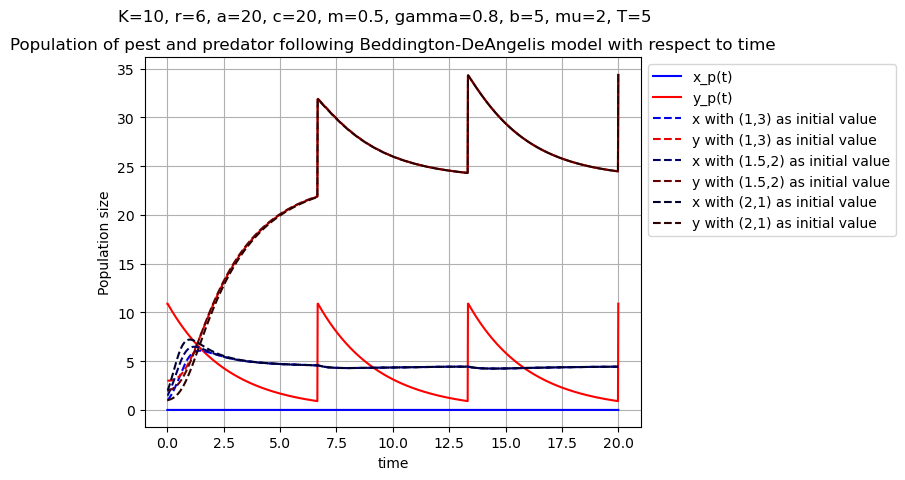

In [210]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label='x with (1,3) as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label='y with (1,3) as initial value')
#plt.plot(t, x_b, color = (0,0,0.8), linestyle='--', label='x with (1.5,3) as initial value')
#plt.plot(t, y_b, color = (0.8,0,0), linestyle='--', label='y with (1.5,3) as initial value')
#plt.plot(t, x_c, color = (0,0,0.7), linestyle='--', label='x with (1,2) as initial value')
#plt.plot(t, y_c, color = (0.7,0,0), linestyle='--', label='y with (1,2) as initial value')
#plt.plot(t, x_d, color = (0,0,0.6), linestyle='--', label='x with (2,3) as initial value')
#plt.plot(t, y_d, color = (0.6,0,0), linestyle='--', label='y with (2,3) as initial value')
#plt.plot(t, x_e, color = (0,0,0.5), linestyle='--', label='x with (1,1) as initial value')
#plt.plot(t, y_e, color = (0.5,0,0), linestyle='--', label='y with (1,1) as initial value')
plt.plot(t, x_f, color = (0,0,0.4), linestyle='--', label='x with (1.5,2) as initial value')
plt.plot(t, y_f, color = (0.4,0,0), linestyle='--', label='y with (1.5,2) as initial value')
#plt.plot(t, x_g, color = (0,0,0.3), linestyle='--', label='x with (1.5,1) as initial value')
#plt.plot(t, y_g, color = (0.3,0,0), linestyle='--', label='y with (1.5,1) as initial value')
#plt.plot(t, x_h, color = (0,0,0.2), linestyle='--', label='x with (2,2) as initial value')
#plt.plot(t, y_h, color = (0.2,0,0), linestyle='--', label='y with (2,2) as initial value')
plt.plot(t, x_i, color = (0,0,0.18), linestyle='--', label='x with (2,1) as initial value')
plt.plot(t, y_i, color = (0.18,0,0), linestyle='--', label='y with (2,1) as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator following Beddington-DeAngelis model with respect to time')
plt.suptitle('K=10, r=6, a=20, c=20, m=0.5, gamma=0.8, b=5, mu=2, T=5')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()